In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


### Importing Required Libraries

- **TensorFlow** is used to build and train deep learning models.
- **NumPy** helps in numerical operations and array handling.
- **Matplotlib** is used to visualize images and performance graphs.

These libraries form the foundation of our deep learning project.


In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Loading the MNIST Dataset

The MNIST dataset contains handwritten digit images (0–9).
It is already split into:
- Training data (used to train the model)
- Testing data (used to evaluate the model)

This dataset is widely used for image classification tasks.


In [ ]:
print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


### Understanding Dataset Shape

- There are 60,000 training images and 10,000 testing images.
- Each image has a size of 28 × 28 pixels.

This confirms the dataset is loaded correctly.


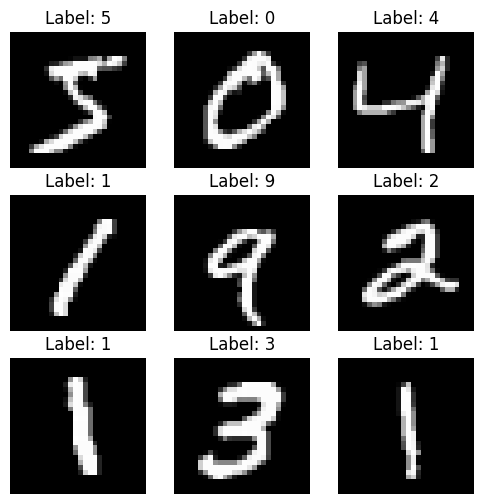

In [ ]:
plt.figure(figsize=(6,6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


### Visualizing MNIST Images

Before training, it is important to visually inspect the dataset.
This cell displays sample handwritten digit images along with their labels.


In [ ]:
print("Minimum pixel value:", x_train.min())
print("Maximum pixel value:", x_train.max())


Minimum pixel value: 0
Maximum pixel value: 255


### Pixel Values in Images

Each image consists of pixel values ranging from:
- 0 (black)
- 255 (white)

Neural networks perform better when input values are scaled.


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


### Normalization

Normalization scales pixel values from 0–255 to 0–1.
This helps the model learn faster and improves training stability.


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("New training shape:", x_train.shape)
print("New testing shape:", x_test.shape)


New training shape: (60000, 28, 28, 1)
New testing shape: (10000, 28, 28, 1)


### Reshaping Data for CNN

CNN models expect image data in the format:
(number of images, height, width, channels)

Since MNIST images are grayscale, the channel value is 1.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Building the CNN Model

- Convolution layers extract image features.
- Pooling layers reduce image size and computation.
- Dense layers perform classification.
- Softmax outputs probabilities for digits 0–9.


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Compiling the Model

- Optimizer controls learning speed.
- Loss function measures prediction error.
- Accuracy tracks model performance.


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Model Summary

This shows the architecture, layers, and number of parameters in the CNN.


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1,
    batch_size=32
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.9035 - loss: 0.3138 - val_accuracy: 0.9870 - val_loss: 0.0478
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9865 - loss: 0.0448 - val_accuracy: 0.9862 - val_loss: 0.0449
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 53s 32ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9888 - val_loss: 0.0382
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9935 - loss: 0.0212 - val_accuracy: 0.9798 - val_loss: 0.0678
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9946 - loss: 0.0164 - val_accuracy: 0.9907 - val_loss: 0.0386


### Training the Model

The model learns patterns from training images.
Validation data helps monitor overfitting.


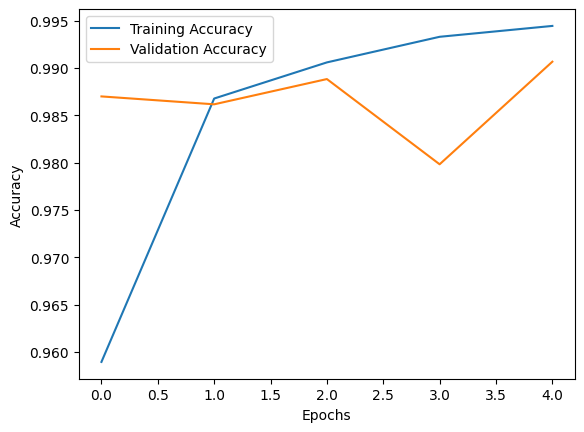

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Accuracy Visualization

This graph shows how model accuracy improves during training.


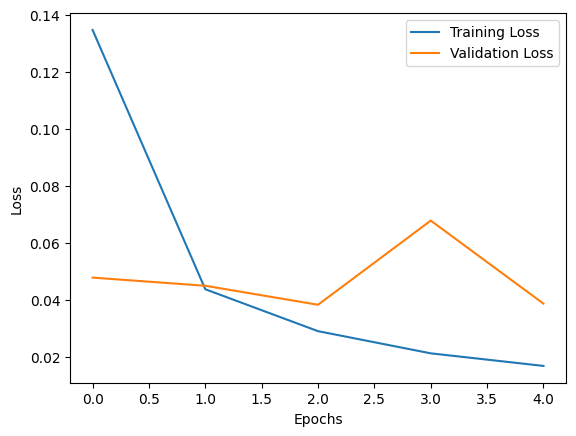

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Loss Visualization

Loss represents prediction error.
Lower loss indicates better learning.


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9860 - loss: 0.0369
Test Accuracy: 0.989300012588501


### Model Evaluation

The test dataset contains unseen images.
High test accuracy shows good generalization.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


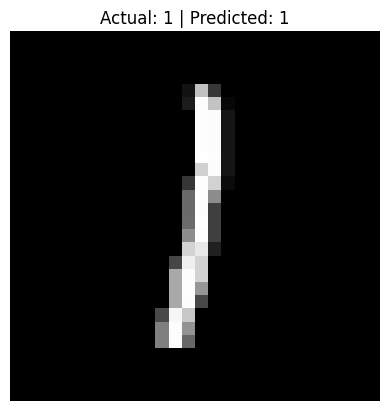

In [ ]:
import random

index = random.randint(0, len(x_test)-1)
prediction = model.predict(x_test[index].reshape(1,28,28,1))
predicted_label = np.argmax(prediction)

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Actual: {y_test[index]} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()


### Random Image Prediction

A random test image is selected.
The model predicts the digit and compares it with the actual label.


## Conclusion

In this project, a Convolutional Neural Network (CNN) was built using TensorFlow
to classify handwritten digit images from the MNIST dataset. The model achieved
high accuracy and its performance was analyzed using accuracy and loss
visualizations. Sample predictions on unseen images demonstrate the
effectiveness of the trained model.

### Future Scope
This project can be extended to real-time digit recognition using a camera and
advanced image preprocessing techniques.
